In [18]:
import yfinance as yf
import  numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [19]:
apple = yf.download("AAPL")
apple = apple.Close.to_frame()
apple

[*********************100%***********************]  1 of 1 completed


,Close
Date,
1980-12-12,0.128348
1980-12-15,0.121652
1980-12-16,0.112723
1980-12-17,0.115513
1980-12-18,0.118862
...,...
2023-07-07,190.679993
2023-07-10,188.610001
2023-07-11,188.080002


In [20]:
# Storing daily log returns in dataframe apple
apple["d_returns"]  = np.log(apple.Close.div(apple.Close.shift(1)))
apple
# apple["d_returns"] = np.log(apple.Close.pct_change(periods = 1)).mul(100)
# apple

,Close,d_returns
Date,,
1980-12-12,0.128348,NaN
1980-12-15,0.121652,-0.053581
1980-12-16,0.112723,-0.076231
1980-12-17,0.115513,0.024450
1980-12-18,0.118862,0.028580
...,...,...
2023-07-07,190.679993,-0.005909
2023-07-10,188.610001,-0.010915
2023-07-11,188.080002,-0.002814


In [21]:
# remove the na value 
apple.dropna(inplace = True)
apple

,Close,d_returns
Date,,
1980-12-15,0.121652,-0.053581
1980-12-16,0.112723,-0.076231
1980-12-17,0.115513,0.024450
1980-12-18,0.118862,0.028580
1980-12-19,0.126116,0.059239
...,...,...
2023-07-07,190.679993,-0.005909
2023-07-10,188.610001,-0.010915
2023-07-11,188.080002,-0.002814


In [22]:
# Now lets see the how much we gain after investing 1 dolar in starting 
np.exp(apple.d_returns.sum())

# this same concept we use in Cummaltive

1484.5576388482634

So if i had invested 1 dollar in the starting that will become 1484.5576 dollar now 

In [23]:
apple["cummreturns"] = apple.d_returns.cumsum().apply(np.exp)
apple

# Each point returns the cummlative return upto that point

,Close,d_returns,cummreturns
Date,,,
1980-12-15,0.121652,-0.053581,0.947829
1980-12-16,0.112723,-0.076231,0.878261
1980-12-17,0.115513,0.024450,0.899998
1980-12-18,0.118862,0.028580,0.926092
1980-12-19,0.126116,0.059239,0.982610
...,...,...,...
2023-07-07,190.679993,-0.005909,1485.648419
2023-07-10,188.610001,-0.010915,1469.520453
2023-07-11,188.080002,-0.002814,1465.391064


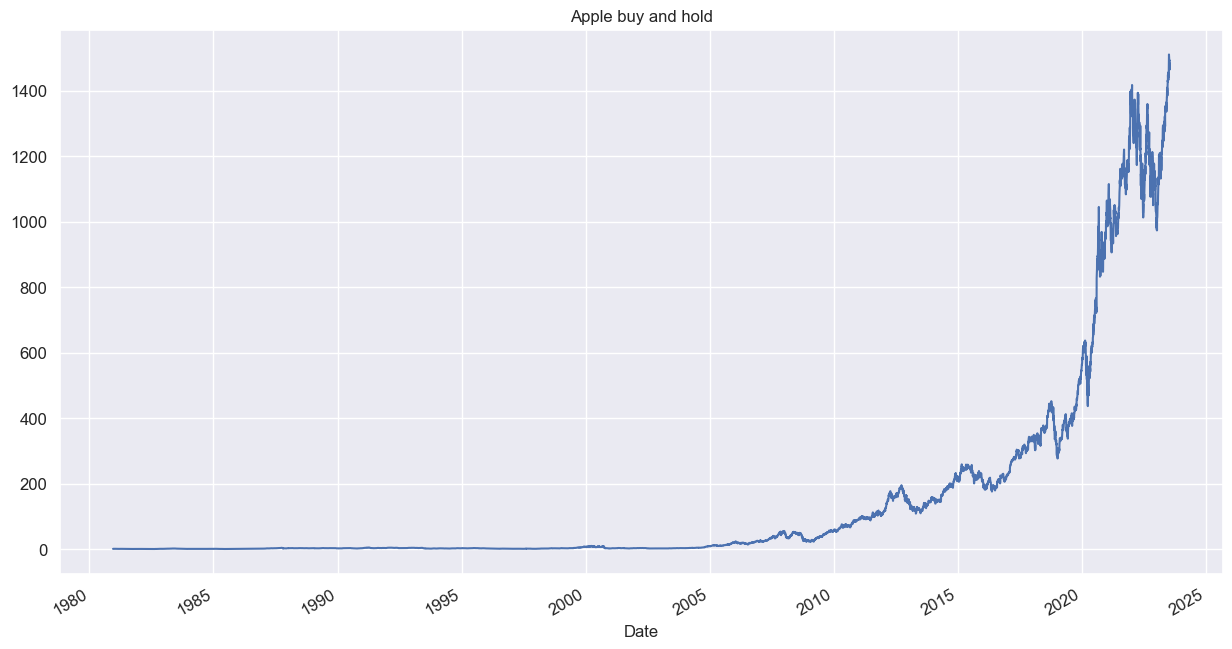

In [24]:
sns.set()
apple.cummreturns.plot(figsize=(15,8),title="Apple buy and hold",fontsize=12)
plt.show()

In [25]:
# Calculating annualy 
apple.d_returns.mean()*252

0.1714480877940865

In [26]:
apple.d_returns.std()*np.sqrt(252)

0.45359493838993237

# How to calculate the drawdowns
Calualate from the peak all the way to down 

In [27]:
apple["cummax"] = apple.cummreturns.cummax()
apple

,Close,d_returns,cummreturns,cummax
Date,,,,
1980-12-15,0.121652,-0.053581,0.947829,0.947829
1980-12-16,0.112723,-0.076231,0.878261,0.947829
1980-12-17,0.115513,0.024450,0.899998,0.947829
1980-12-18,0.118862,0.028580,0.926092,0.947829
1980-12-19,0.126116,0.059239,0.982610,0.982610
...,...,...,...,...
2023-07-07,190.679993,-0.005909,1485.648419,1511.281921
2023-07-10,188.610001,-0.010915,1469.520453,1511.281921
2023-07-11,188.080002,-0.002814,1465.391064,1511.281921


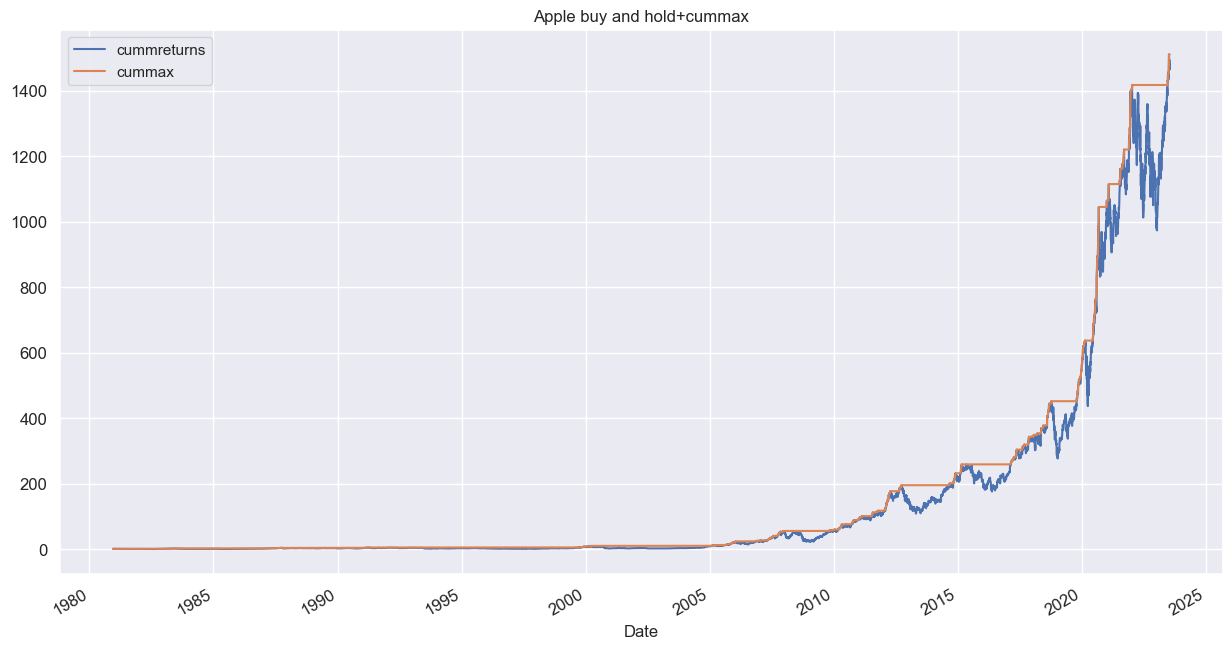

In [28]:
sns.set()
apple[["cummreturns","cummax"]].plot(figsize=(15,8),title="Apple buy and hold+cummax",fontsize=12)
plt.show()

In [29]:
# Calculating the drawdowns 
apple["drawdowns"] = apple["cummax"] - apple["cummreturns"]
apple

,Close,d_returns,cummreturns,cummax,drawdowns
Date,,,,,
1980-12-15,0.121652,-0.053581,0.947829,0.947829,0.000000
1980-12-16,0.112723,-0.076231,0.878261,0.947829,0.069569
1980-12-17,0.115513,0.024450,0.899998,0.947829,0.047831
1980-12-18,0.118862,0.028580,0.926092,0.947829,0.021738
1980-12-19,0.126116,0.059239,0.982610,0.982610,0.000000
...,...,...,...,...,...
2023-07-07,190.679993,-0.005909,1485.648419,1511.281921,25.633502
2023-07-10,188.610001,-0.010915,1469.520453,1511.281921,41.761468
2023-07-11,188.080002,-0.002814,1465.391064,1511.281921,45.890857


In [32]:
apple.drawdowns.max()

444.02718404402015

In [33]:
# lets see the date 
apple.drawdowns.idxmax()

Timestamp('2023-01-05 00:00:00')

In [34]:
apple.loc[(apple.index<="2023-01-05")]

,Close,d_returns,cummreturns,cummax,drawdowns
Date,,,,,
1980-12-15,0.121652,-0.053581,0.947829,0.947829,0.000000
1980-12-16,0.112723,-0.076231,0.878261,0.947829,0.069569
1980-12-17,0.115513,0.024450,0.899998,0.947829,0.047831
1980-12-18,0.118862,0.028580,0.926092,0.947829,0.021738
1980-12-19,0.126116,0.059239,0.982610,0.982610,0.000000
...,...,...,...,...,...
2022-12-29,129.610001,0.027931,1009.832703,1418.097708,408.265004
2022-12-30,129.929993,0.002466,1012.325863,1418.097708,405.771845
2023-01-03,125.070000,-0.038122,974.460113,1418.097708,443.637594


In [35]:
# now calculating the percentage 
apple["drawdown%"] = (apple["cummax"] - apple["cummreturns"])/apple["cummax"]

In [36]:
apple["drawdown%"].max()

0.82216567924191

In [37]:
apple["drawdown%"].idxmax()

Timestamp('1997-12-23 00:00:00')